In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [4]:
df=pd.read_csv('BTCUSDT-1H.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4381 non-null   object 
 1   open       4381 non-null   float64
 2   high       4381 non-null   float64
 3   low        4381 non-null   float64
 4   close      4381 non-null   float64
 5   volume     4381 non-null   float64
dtypes: float64(5), object(1)
memory usage: 205.5+ KB


In [6]:
df['Price Change']=df['close'] - df['open']
df['Volatility']=df['high'] - df['low']/ df['open']
df['Rolling_Mean_Close']=df['close'].rolling(window=5).mean()
df['Rolling_Std_Close']=df['close'].rolling(window=5).std()

In [7]:
df['Target_Close']=df['close'].shift(-1)
df['Target_Movement']=(df['close'].shift(-1)>df['close']).astype(int)

In [8]:
df['vol_1h'] = df['high'] - df['low']
df['vol_1h_next'] = df['vol_1h'].shift(-1)
median_vol = df['vol_1h_next'].median()
df['vol_regime'] = (df['vol_1h_next'] > median_vol).astype(int)

window = 6
df['vol_mean_6h'] = df['vol_1h'].rolling(window).mean()
df['vol_std_6h']  = df['vol_1h'].rolling(window).std()
df['vol_max_6h']  = df['vol_1h'].rolling(window).max()
df['vol_min_6h']  = df['vol_1h'].rolling(window).min()

df['return_1h'] = df['close'].pct_change().shift(-1)
df['return_mean_6h'] = df['return_1h'].rolling(window).mean()
df['return_std_6h'] = df['return_1h'].rolling(window).std()

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y:%m:%d %H:%M:%S')

In [10]:
df = df.sort_values('timestamp')

In [11]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day

In [12]:
import ta
df['rsi'] = ta.momentum.RSIIndicator(close=df['close'], window=14).rsi()
df['macd'] = ta.trend.MACD(close=df['close']).macd()
bb = ta.volatility.BollingerBands(close=df['close'])
df['bb_high'] = bb.bollinger_hband()
df['bb_low'] = bb.bollinger_lband()
df['ema_10'] = df['close'].ewm(span=10).mean()
df['ema_30'] = df['close'].ewm(span=30).mean()
df['high_low_ratio'] = df['high'] / df['low']
df['close_open_diff'] = df['close'] - df['open']
df['close_lag_1'] = df['close'].shift(1)
df['volume_lag_1'] = df['volume'].shift(1)
df['rolling_max_6h'] = df['close'].rolling(window=6).max()
df['rolling_min_6h'] = df['close'].rolling(window=6).min()
df['price_volatility_interaction'] = df['close'] * df['Volatility']
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

In [13]:
print(df.isnull().sum())

timestamp                        0
open                             0
high                             0
low                              0
close                            0
volume                           0
Price Change                     0
Volatility                       0
Rolling_Mean_Close               4
Rolling_Std_Close                4
Target_Close                     1
Target_Movement                  0
vol_1h                           0
vol_1h_next                      1
vol_regime                       0
vol_mean_6h                      5
vol_std_6h                       5
vol_max_6h                       5
vol_min_6h                       5
return_1h                        1
return_mean_6h                   6
return_std_6h                    6
hour                             0
dayofweek                        0
day                              0
rsi                             13
macd                            25
bb_high                         19
bb_low              

In [14]:
df.dropna(inplace=True)

In [15]:
df.head()

,timestamp,open,high,low,close,volume,Price Change,Volatility,Rolling_Mean_Close,Rolling_Std_Close,...,close_open_diff,close_lag_1,volume_lag_1,rolling_max_6h,rolling_min_6h,price_volatility_interaction,hour_sin,hour_cos,day_sin,day_cos
25,2021-04-20 08:00:00,54410.57,55313.90,54230.38,55220.29,3227.0060,809.72,55312.903312,54739.176,598.567126,...,809.72,54410.57,3889.6536,55258.63,53856.35,3.054395e+09,8.660254e-01,-0.500000,0.781831,0.62349
26,2021-04-20 09:00:00,55220.30,55433.40,54781.59,54889.16,2858.5535,-331.14,55432.407945,54665.282,538.166225,...,-331.14,55220.29,3227.0060,55258.63,53856.35,3.042638e+09,7.071068e-01,-0.707107,0.781831,0.62349
27,2021-04-20 10:00:00,54889.15,56239.31,54824.81,55908.52,4372.3223,1019.37,56238.311172,54856.978,780.914266,...,1019.37,54889.16,2858.5535,55908.52,53856.35,3.144201e+09,5.000000e-01,-0.866025,0.781831,0.62349
28,2021-04-20 11:00:00,55908.52,56419.13,55680.64,56266.83,2774.0605,358.31,56418.134076,55339.074,752.271870,...,358.31,55908.52,4372.3223,56266.83,53856.35,3.174470e+09,2.588190e-01,-0.965926,0.781831,0.62349
29,2021-04-20 12:00:00,56266.83,56290.31,55604.73,55801.14,2705.9443,-465.69,56289.321767,55617.188,554.143527,...,-465.69,56266.83,2774.0605,56266.83,54410.57,3.141008e+09,1.224647e-16,-1.000000,0.781831,0.62349


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4355 entries, 25 to 4379
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     4355 non-null   datetime64[ns]
 1   open                          4355 non-null   float64       
 2   high                          4355 non-null   float64       
 3   low                           4355 non-null   float64       
 4   close                         4355 non-null   float64       
 5   volume                        4355 non-null   float64       
 6   Price Change                  4355 non-null   float64       
 7   Volatility                    4355 non-null   float64       
 8   Rolling_Mean_Close            4355 non-null   float64       
 9   Rolling_Std_Close             4355 non-null   float64       
 10  Target_Close                  4355 non-null   float64       
 11  Target_Movement               4355

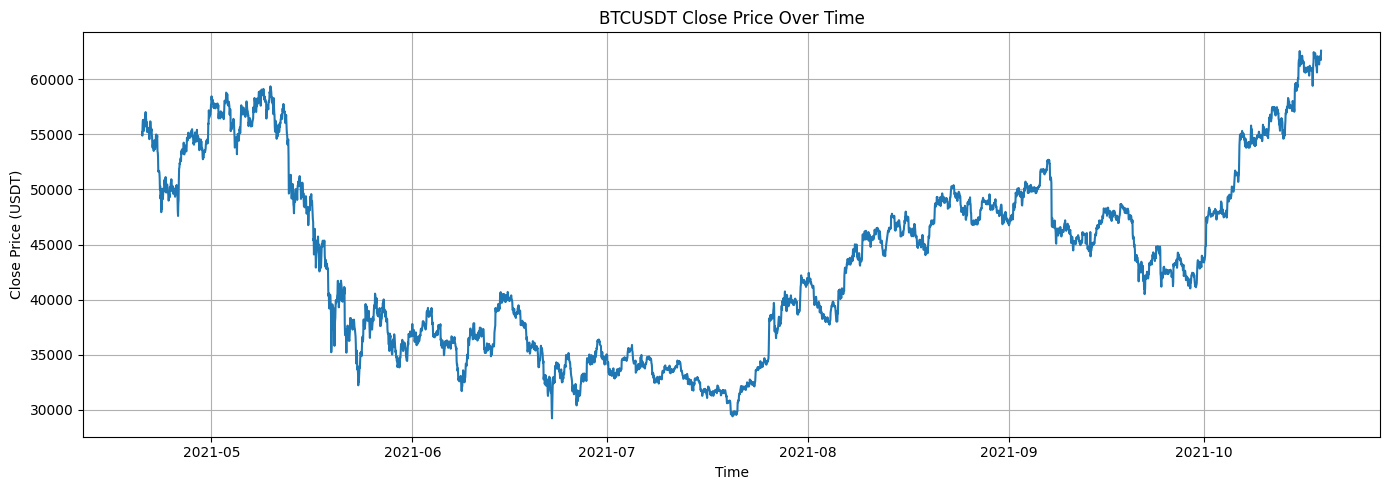

In [41]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='timestamp', y='close')
plt.title("BTCUSDT Close Price Over Time")
plt.xlabel("Time")
plt.ylabel("Close Price (USDT)")
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Close Prices')

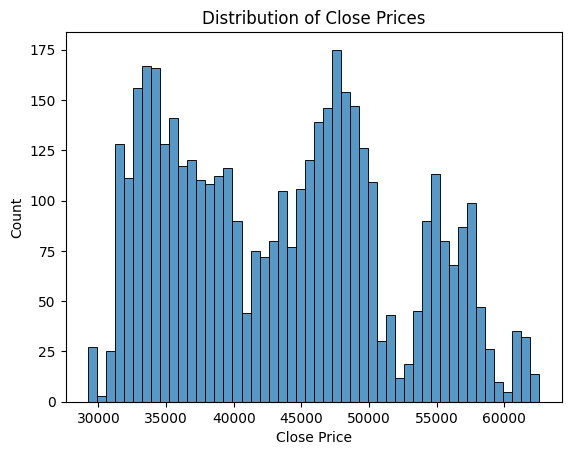

In [42]:
sns.histplot(df['close'], bins=50)
plt.xlabel('Close Price')
plt.title("Distribution of Close Prices")

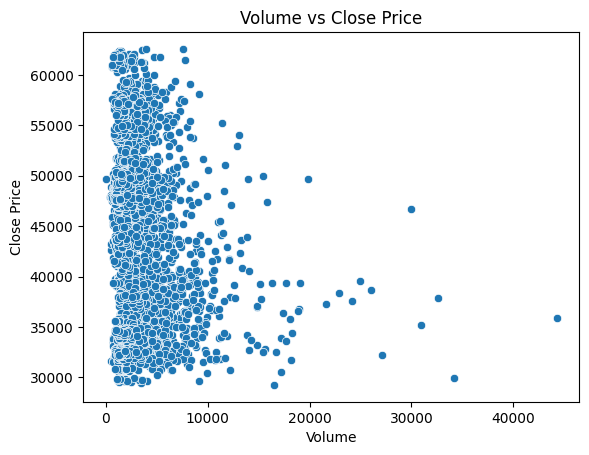

In [43]:
sns.scatterplot(x='volume', y='close', data=df)
plt.title('Volume vs Close Price')
plt.xlabel('Volume')    
plt.ylabel('Close Price')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

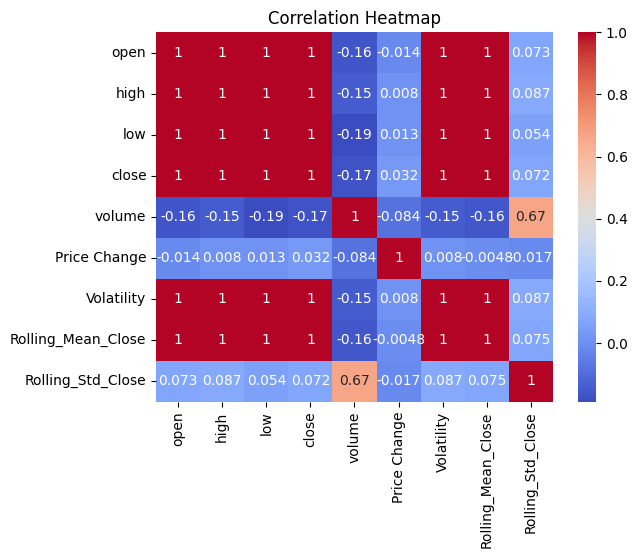

In [44]:
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume', 'Price Change', 'Volatility', 'Rolling_Mean_Close', 'Rolling_Std_Close']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

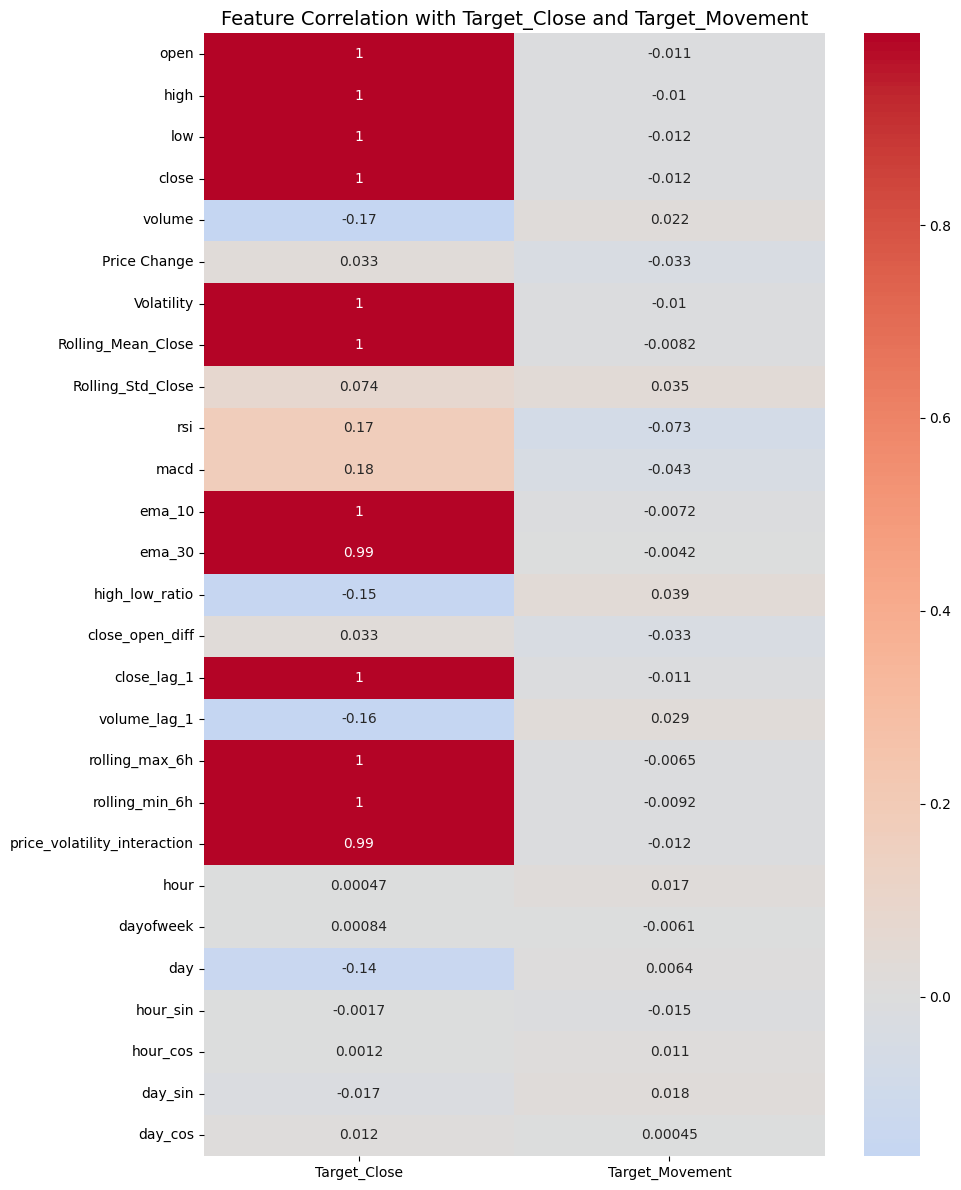

In [17]:
features = [
    'open', 'high', 'low', 'close', 'volume', 'Price Change', 'Volatility',
    'Rolling_Mean_Close', 'Rolling_Std_Close', 'rsi', 'macd', 'ema_10', 'ema_30',
    'high_low_ratio', 'close_open_diff', 'close_lag_1', 'volume_lag_1',
    'rolling_max_6h', 'rolling_min_6h', 'price_volatility_interaction',
    'hour', 'dayofweek', 'day', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos',
    'Target_Close', 'Target_Movement'
]

# Filter only these columns from your DataFrame
corr_df = df[features].corr()

# Filter only rows related to the two targets
target_corr = corr_df[['Target_Close', 'Target_Movement']].drop(['Target_Close', 'Target_Movement'])

# Plot heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation with Target_Close and Target_Movement", fontsize=14)
plt.tight_layout()
plt.show()

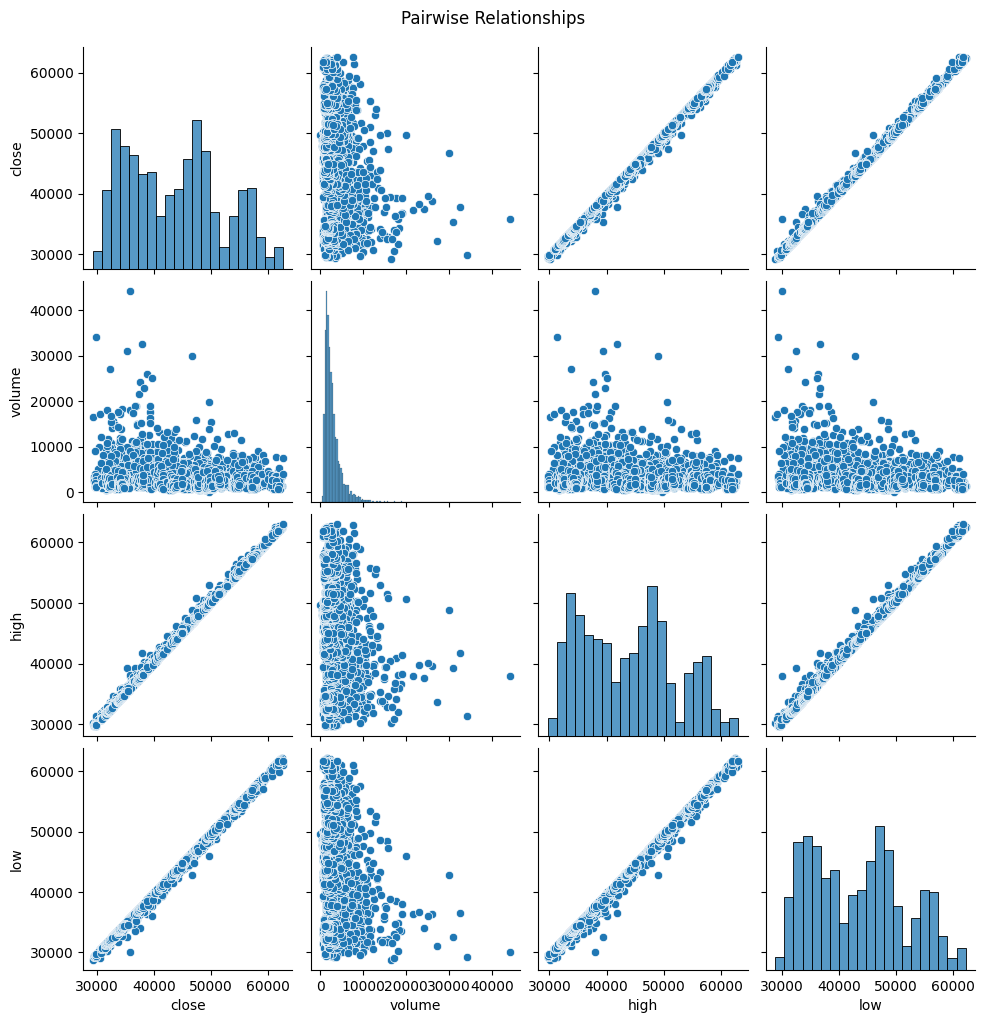

In [45]:
sns.pairplot(df[['close', 'volume', 'high', 'low']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'Price Change',
       'Volatility', 'Rolling_Mean_Close', 'Rolling_Std_Close', 'Target_Close',
       'Target_Movement', 'vol_1h', 'vol_1h_next', 'vol_regime', 'vol_mean_6h',
       'vol_std_6h', 'vol_max_6h', 'vol_min_6h', 'return_1h', 'return_mean_6h',
       'return_std_6h', 'hour', 'dayofweek', 'day', 'rsi', 'macd', 'bb_high',
       'bb_low', 'ema_10', 'ema_30', 'high_low_ratio', 'close_open_diff',
       'close_lag_1', 'volume_lag_1', 'rolling_max_6h', 'rolling_min_6h',
       'price_volatility_interaction', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos'],
      dtype='object')

MODEL 1(Target_Close)

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
X = df[[
    'volume', 'Price Change', 'Rolling_Std_Close', 'vol_1h', 'vol_mean_6h', 
    'vol_std_6h', 'vol_max_6h', 'vol_min_6h', 'hour', 'dayofweek', 'day', 'rsi', 'high_low_ratio', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos'
]]

y = df['Target_Close']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
Xtr = scaler.transform(X_train)
Xte = scaler.transform(X_test)

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

In [52]:
# Create a DataFrame for results
results_df = pd.DataFrame(results).T
results_df.columns = ['MAE', 'MSE', 'RMSE', 'R2']
results_df = results_df.sort_values(by='R2', ascending=False)

# Display the results nicely
print("\n=== Regression Model Evaluation ===\n")
print(results_df)


=== Regression Model Evaluation ===

                           MAE           MSE         RMSE        R2
XGBoost            1160.155158  2.625189e+06  1620.243615  0.964654
Random Forest      1364.826811  4.199508e+06  2049.270158  0.943457
Decision Tree      1635.184524  8.594896e+06  2931.705303  0.884278
Linear Regression  3839.917214  2.229122e+07  4721.357349  0.699869
SVR                7482.971938  7.413248e+07  8610.021848  0.001874


In [53]:
# 1. Define parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3 ,5 ,7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2.0],
}

# 2. Set up base model
xgb_base = XGBRegressor(random_state=42)

# 3. RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_grid,
    n_iter=100,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 4. Fit on training data
random_search.fit(X_train, y_train)

# 5. Best model
best_xgb = random_search.best_estimator_

# 6. Predict and evaluate
y_pred = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 7. Output results
print("\n=== Tuned XGBoost Performance ===")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

=== Tuned XGBoost Performance ===
MAE  : 947.1741
MSE  : 1817790.6404
RMSE : 1348.2547
R²   : 0.9755
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


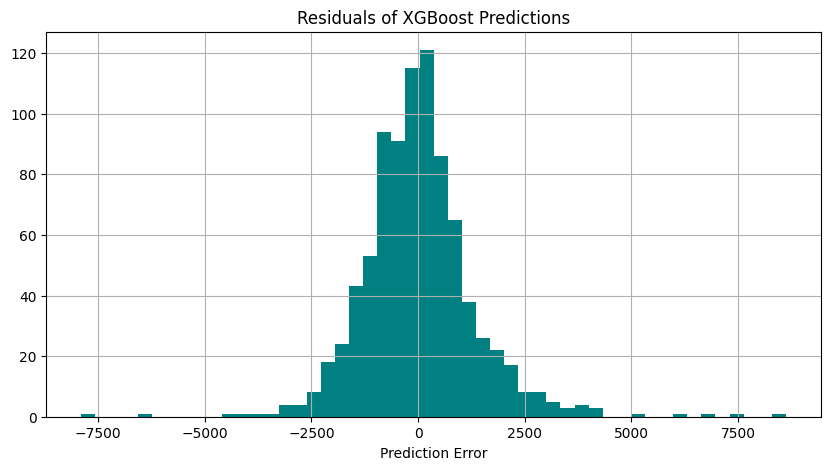

In [54]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, color='teal')
plt.title("Residuals of XGBoost Predictions")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.show()

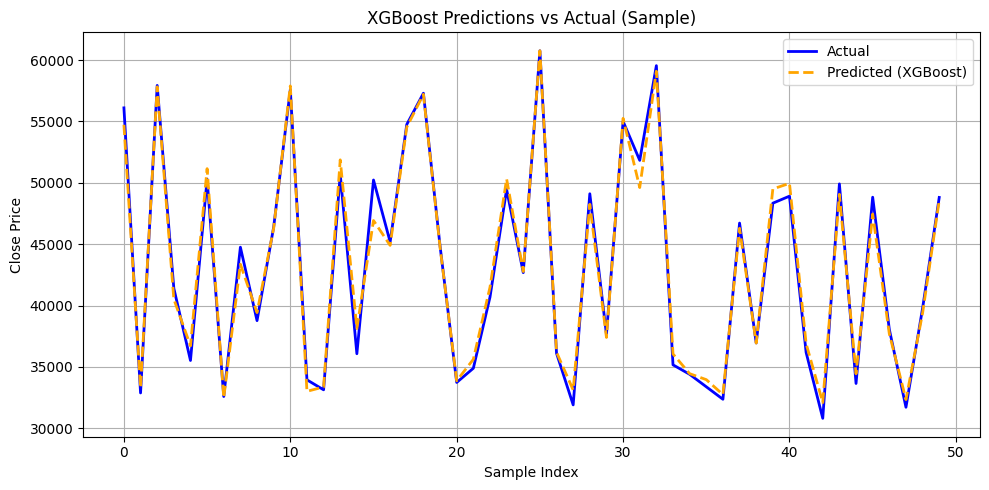

In [55]:
plt.figure(figsize=(10, 5))

# Focus on a narrower range where prediction is relatively stable
sample_range = slice(20, 70)

plt.plot(y_test.values[sample_range], label='Actual', color='blue', linewidth=2)
plt.plot(y_pred[sample_range], label='Predicted (XGBoost)', color='orange', linestyle='--', linewidth=2)

plt.legend()
plt.title('XGBoost Predictions vs Actual (Sample)')
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

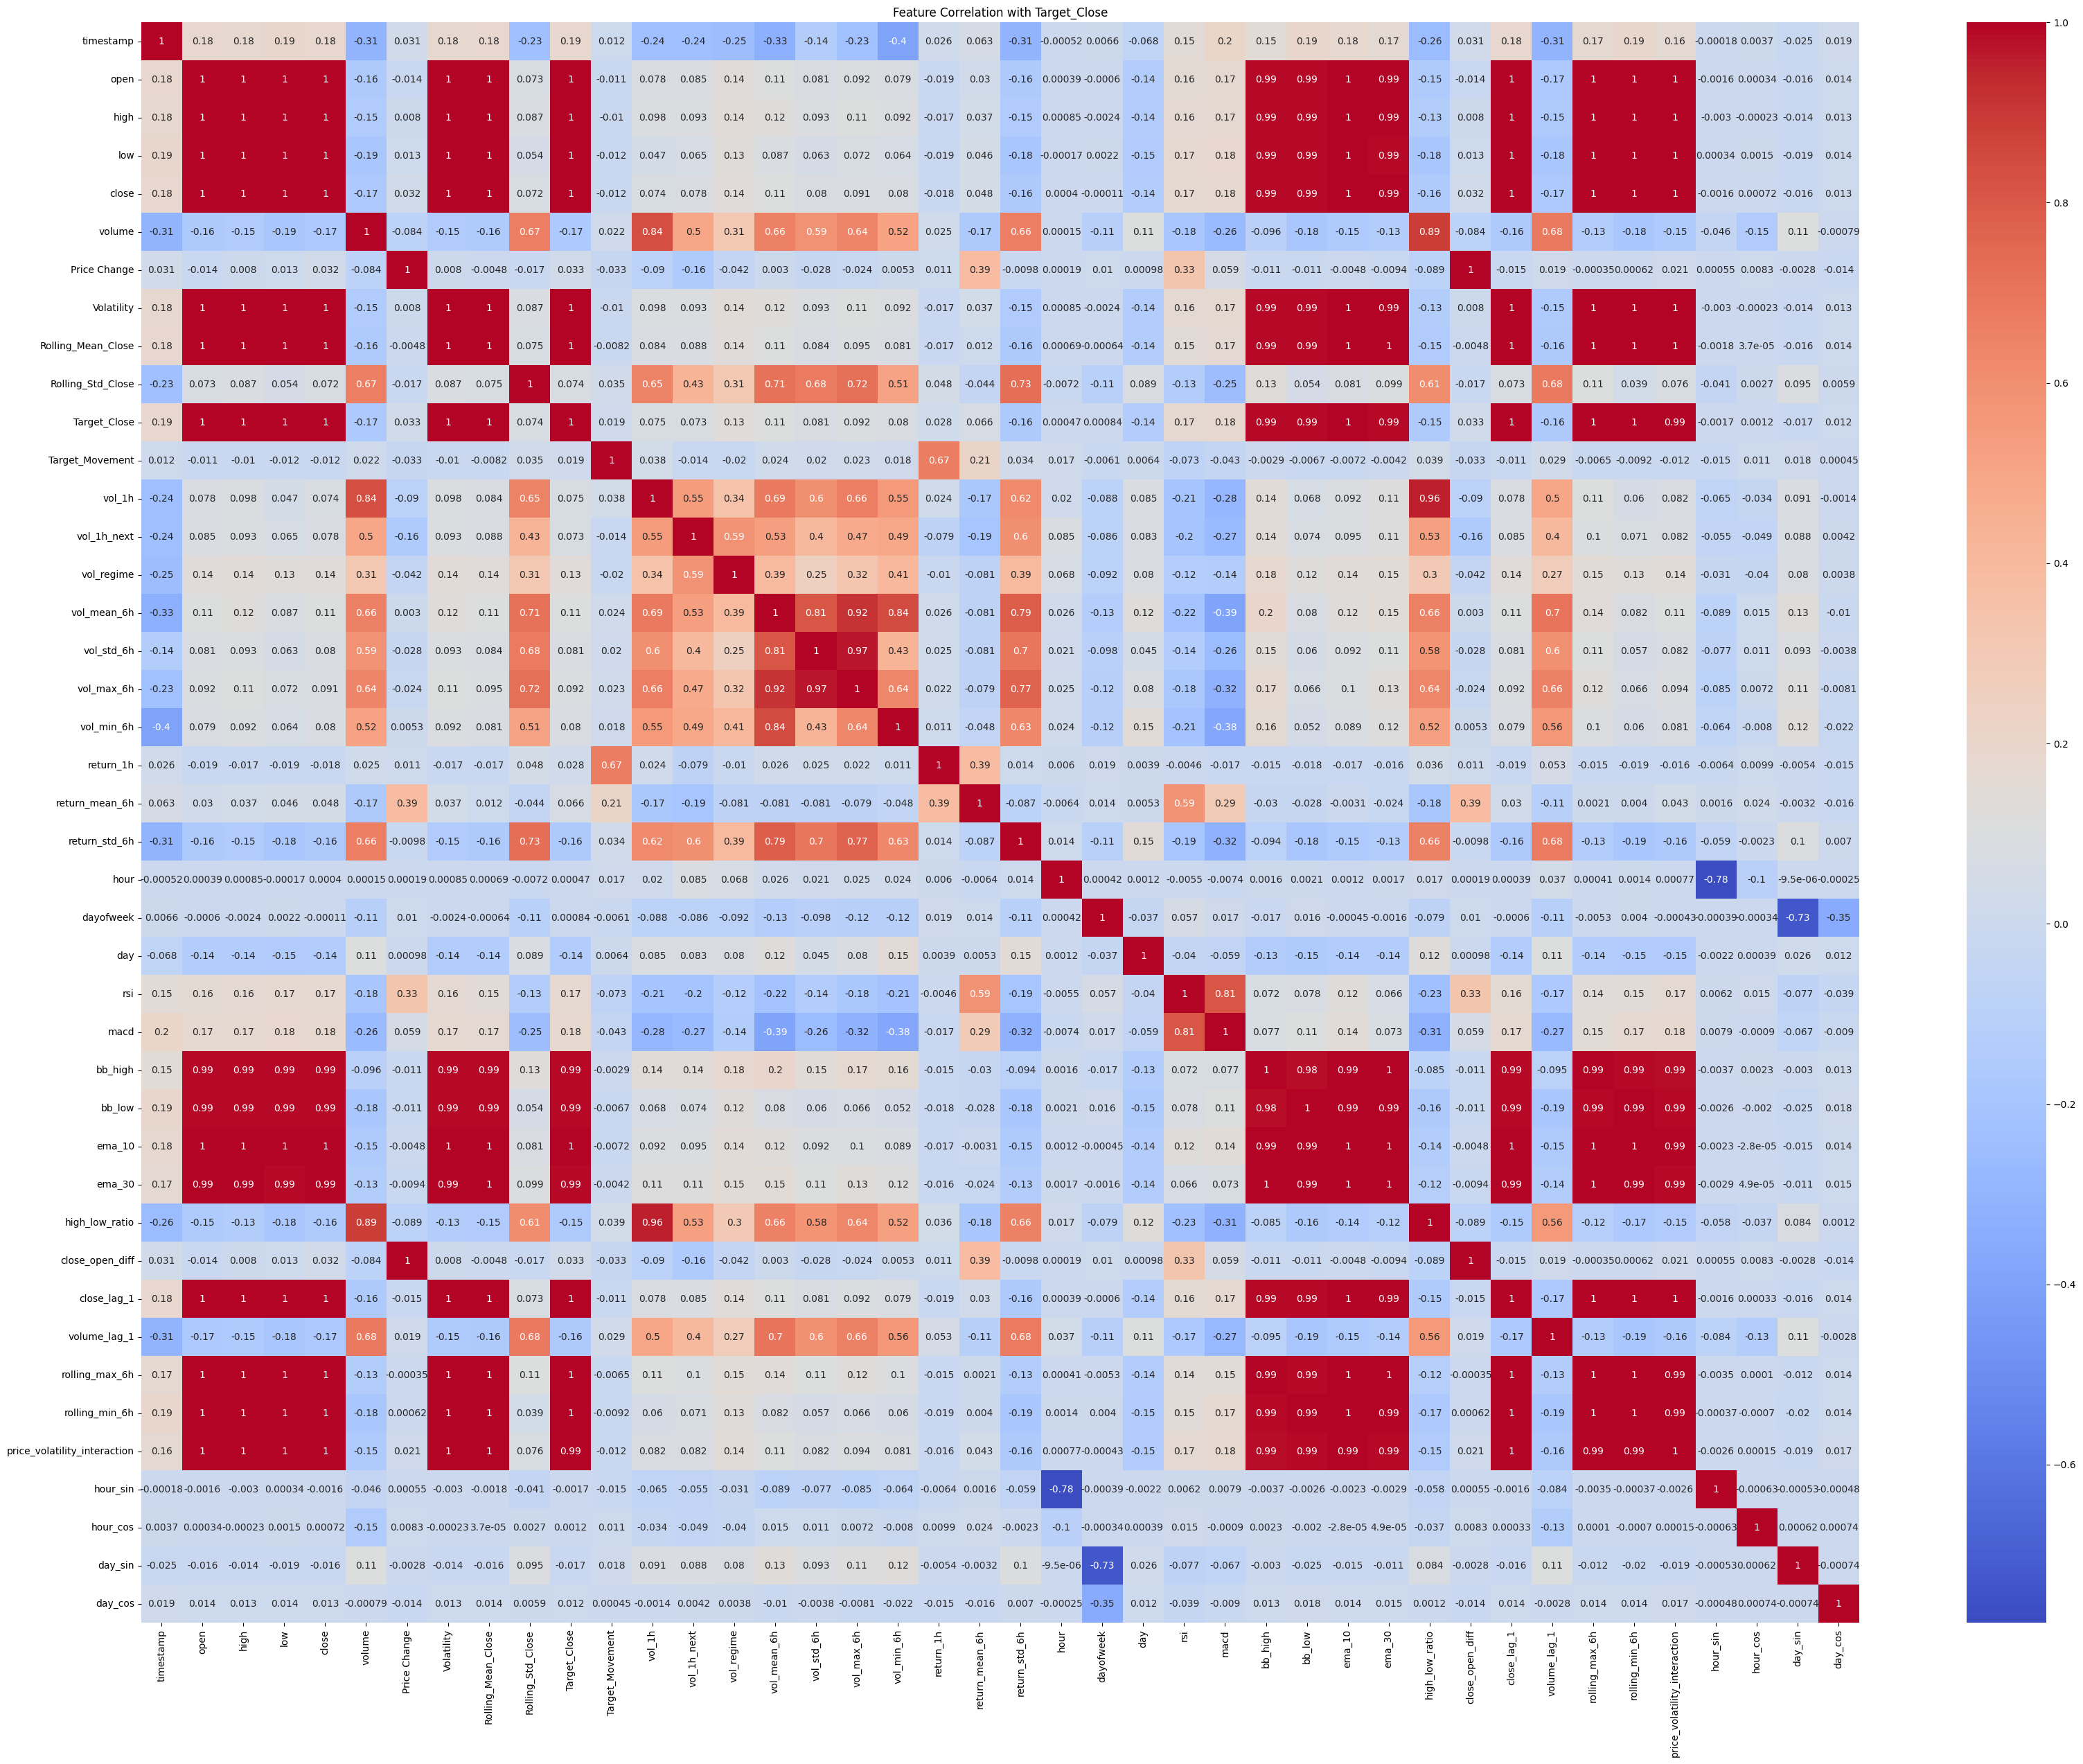

In [56]:
corr = df.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Target_Close")
plt.show()

In [57]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    print("R²:", r2_score(y_test, y_pred))

R²: -63.06961972720231
R²: -20.839239710874416
R²: 0.5981357146151435
R²: -10.554222432731313
R²: 0.20113300143465163


MODEL 2(Target_Movement)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [59]:
df.head()

,timestamp,open,high,low,close,volume,Price Change,Volatility,Rolling_Mean_Close,Rolling_Std_Close,...,close_open_diff,close_lag_1,volume_lag_1,rolling_max_6h,rolling_min_6h,price_volatility_interaction,hour_sin,hour_cos,day_sin,day_cos
25,2021-04-20 08:00:00,54410.57,55313.90,54230.38,55220.29,3227.0060,809.72,55312.903312,54739.176,598.567126,...,809.72,54410.57,3889.6536,55258.63,53856.35,3.054395e+09,8.660254e-01,-0.500000,0.781831,0.62349
26,2021-04-20 09:00:00,55220.30,55433.40,54781.59,54889.16,2858.5535,-331.14,55432.407945,54665.282,538.166225,...,-331.14,55220.29,3227.0060,55258.63,53856.35,3.042638e+09,7.071068e-01,-0.707107,0.781831,0.62349
27,2021-04-20 10:00:00,54889.15,56239.31,54824.81,55908.52,4372.3223,1019.37,56238.311172,54856.978,780.914266,...,1019.37,54889.16,2858.5535,55908.52,53856.35,3.144201e+09,5.000000e-01,-0.866025,0.781831,0.62349
28,2021-04-20 11:00:00,55908.52,56419.13,55680.64,56266.83,2774.0605,358.31,56418.134076,55339.074,752.271870,...,358.31,55908.52,4372.3223,56266.83,53856.35,3.174470e+09,2.588190e-01,-0.965926,0.781831,0.62349
29,2021-04-20 12:00:00,56266.83,56290.31,55604.73,55801.14,2705.9443,-465.69,56289.321767,55617.188,554.143527,...,-465.69,56266.83,2774.0605,56266.83,54410.57,3.141008e+09,1.224647e-16,-1.000000,0.781831,0.62349


In [60]:
from xgboost import XGBClassifier, plot_importance

In [61]:
X2 = df[['volume', 'Price Change', 'Volatility', 'Rolling_Mean_Close', 'Rolling_Std_Close',
         'vol_mean_6h', 'vol_std_6h', 'vol_max_6h', 'vol_min_6h', 'return_mean_6h',
         'return_std_6h', 'hour', 'dayofweek', 'day', 'rsi', 'macd', 'bb_high',
         'bb_low', 'ema_10', 'ema_30', 'high_low_ratio', 'close_open_diff',
         'close_lag_1', 'volume_lag_1', 'rolling_max_6h', 'rolling_min_6h',
         'price_volatility_interaction', 'hour_sin', 'hour_cos', 'day_sin',
         'day_cos']]
X2.dropna(inplace=True)
X2.head()

C:\Users\MOHIT\AppData\Local\Temp\ipykernel_9168\2528792067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2.dropna(inplace=True)


,volume,Price Change,Volatility,Rolling_Mean_Close,Rolling_Std_Close,vol_mean_6h,vol_std_6h,vol_max_6h,vol_min_6h,return_mean_6h,...,close_open_diff,close_lag_1,volume_lag_1,rolling_max_6h,rolling_min_6h,price_volatility_interaction,hour_sin,hour_cos,day_sin,day_cos
25,3227.0060,809.72,55312.903312,54739.176,598.567126,1098.645,329.553468,1688.96,782.49,0.000453,...,809.72,54410.57,3889.6536,55258.63,53856.35,3.054395e+09,8.660254e-01,-0.500000,0.781831,0.62349
26,2858.5535,-331.14,55432.407945,54665.282,538.166225,1017.050,374.410527,1688.96,651.81,0.002043,...,-331.14,55220.29,3227.0060,55258.63,53856.35,3.042638e+09,7.071068e-01,-0.707107,0.781831,0.62349
27,4372.3223,1019.37,56238.311172,54856.978,780.914266,1122.385,384.003007,1688.96,651.81,0.004042,...,1019.37,54889.16,2858.5535,55908.52,53856.35,3.144201e+09,5.000000e-01,-0.866025,0.781831,0.62349
28,2774.0605,358.31,56418.134076,55339.074,752.271870,1113.060,394.105890,1688.96,651.81,0.005980,...,358.31,55908.52,4372.3223,56266.83,53856.35,3.174470e+09,2.588190e-01,-0.965926,0.781831,0.62349
29,2705.9443,-465.69,56289.321767,55617.188,554.143527,945.830,303.275573,1414.50,651.81,0.005809,...,-465.69,56266.83,2774.0605,56266.83,54410.57,3.141008e+09,1.224647e-16,-1.000000,0.781831,0.62349


In [62]:
y2=df['Target_Movement']
y2.head()

25    0
26    1
27    1
28    0
29    1
Name: Target_Movement, dtype: int64

In [63]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler().fit(X2_train)
Xtr = scaler.transform(X2_train)
Xte = scaler.transform(X2_test)

In [65]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [66]:
max_k = 100
accuracy = []

for i in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtr, y2_train)
    y_pred = knn.predict(Xte)
    accuracy.append(accuracy_score(y2_test, y_pred))

for i, acc in enumerate(accuracy, 1):
    print(f"K={i} → Accuracy: {acc:.4f}")

best_k = accuracy.index(max(accuracy)) + 1
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(Xtr, y2_train)

K=1 → Accuracy: 0.4730
K=2 → Accuracy: 0.4879
K=3 → Accuracy: 0.5017
K=4 → Accuracy: 0.4948
K=5 → Accuracy: 0.4902
K=6 → Accuracy: 0.5075
K=7 → Accuracy: 0.5281
K=8 → Accuracy: 0.5132
K=9 → Accuracy: 0.5327
K=10 → Accuracy: 0.5247
K=11 → Accuracy: 0.5258
K=12 → Accuracy: 0.5235
K=13 → Accuracy: 0.5281
K=14 → Accuracy: 0.5189
K=15 → Accuracy: 0.5258
K=16 → Accuracy: 0.5396
K=17 → Accuracy: 0.5534
K=18 → Accuracy: 0.5476
K=19 → Accuracy: 0.5476
K=20 → Accuracy: 0.5522
K=21 → Accuracy: 0.5545
K=22 → Accuracy: 0.5465
K=23 → Accuracy: 0.5499
K=24 → Accuracy: 0.5339
K=25 → Accuracy: 0.5454
K=26 → Accuracy: 0.5408
K=27 → Accuracy: 0.5545
K=28 → Accuracy: 0.5431
K=29 → Accuracy: 0.5442
K=30 → Accuracy: 0.5454
K=31 → Accuracy: 0.5626
K=32 → Accuracy: 0.5465
K=33 → Accuracy: 0.5499
K=34 → Accuracy: 0.5339
K=35 → Accuracy: 0.5476
K=36 → Accuracy: 0.5454
K=37 → Accuracy: 0.5522
K=38 → Accuracy: 0.5476
K=39 → Accuracy: 0.5522
K=40 → Accuracy: 0.5454
K=41 → Accuracy: 0.5408
K=42 → Accuracy: 0.5454
K

KNeighborsClassifier(n_neighbors=93)

In [67]:
gnb = GaussianNB()
gnb.fit(Xtr, y2_train)
y_pred_nb = gnb.predict(Xte)
print("Naive Bayes Accuracy:", accuracy_score(y2_test, y_pred_nb))

Naive Bayes Accuracy: 0.5166475315729047


In [68]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(Xtr, y2_train)
y_pred_dt = dtree.predict(Xte)
print("Decision Tree Accuracy:", accuracy_score(y2_test, y_pred_dt))

Decision Tree Accuracy: 0.600459242250287


In [69]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
rf_grid.fit(Xtr, y2_train)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(Xte)
print("Random Forest Accuracy:", accuracy_score(y2_test, y_pred_rf))

Random Forest Accuracy: 0.6440872560275546


In [70]:
from sklearn.pipeline import Pipeline, make_pipeline

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
cv_scores = cross_val_score(lr_pipe, X2, y2, cv=cv, scoring='accuracy')
print("LogReg CV Scores:", cv_scores)
print("LogReg Avg Accuracy:", cv_scores.mean())

lr_pipe.fit(X2_train, y2_train)

LogReg CV Scores: [0.72789897 0.70493685 0.67049369 0.71756602 0.72215844]
LogReg Avg Accuracy: 0.7086107921928817


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svc_param_grid = {
    'C': [1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['linear']
}
random_search = RandomizedSearchCV(SVC(), param_distributions=svc_param_grid, cv=3, n_iter=10, n_jobs=-1)
random_search.fit(Xtr, y2_train)

best_svc = random_search.best_estimator_
y_pred = best_svc.predict(Xte)
print("RandomizedSearch SVC Accuracy:", accuracy_score(y2_test, y_pred))

C:\Users\MOHIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearch SVC Accuracy: 0.7749712973593571


In [72]:
xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=200,
    reg_alpha=0.5,
    reg_lambda=1.5,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb.fit(Xtr, y2_train)
y_pred_xgb = xgb.predict(Xte)
print("XGBoost Accuracy:", accuracy_score(y2_test, y_pred_xgb))

C:\Users\MOHIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:09:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.6796785304247991


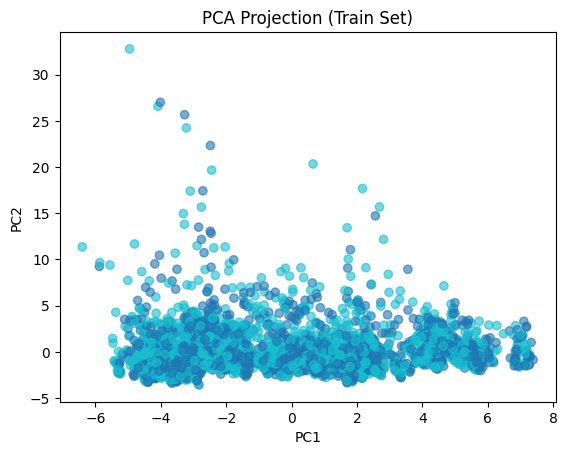

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xtr)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y2_train, cmap="tab10", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (Train Set)")
plt.show()

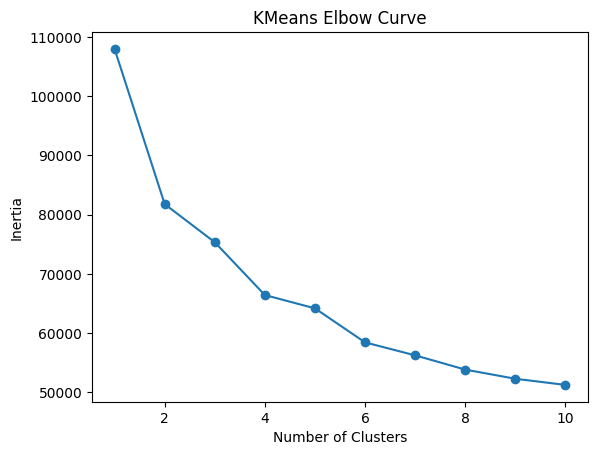

In [74]:
from sklearn.cluster import KMeans

inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(Xtr)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("KMeans Elbow Curve")
plt.show()

In [75]:
model_accuracies = {
    f"KNN (k={best_k})": accuracy_score(y2_test, knn_final.predict(Xte)),
    "Naive Bayes": accuracy_score(y2_test, gnb.predict(Xte)),
    "Decision Tree": accuracy_score(y2_test, dtree.predict(Xte)),
    "Random Forest (GridSearch)": accuracy_score(y2_test, best_rf.predict(Xte)),
    "Logistic Regression (CV)": accuracy_score(y2_test, lr_pipe.predict(X2_test)),
    "SVC (RandomSearch)": accuracy_score(y2_test, best_svc.predict(Xte)),
    "XGBoost": accuracy_score(y2_test, xgb.predict(Xte))
}

print("\n___ Accuracy Comparison ___")
for model, acc in model_accuracies.items():
    print(f"{model:30s}: {acc:.4f}")


___ Accuracy Comparison ___
KNN (k=93)                    : 0.5890
Naive Bayes                   : 0.5166
Decision Tree                 : 0.6005
Random Forest (GridSearch)    : 0.6441
Logistic Regression (CV)      : 0.7279
SVC (RandomSearch)            : 0.7750
XGBoost                       : 0.6797


In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

svc_param_dist = {
    'C': [199, 200, 201],
    'gamma': [0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

random_search = RandomizedSearchCV(
    SVC(),
    param_distributions=svc_param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(Xtr, y2_train)
best_svc = random_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\MOHIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [77]:
y_pred_final = best_svc.predict(Xte)
print("Final Accuracy:", accuracy_score(y2_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y2_test, y_pred_final, zero_division=0))
print("Best Params:", random_search.best_params_)

Final Accuracy: 0.7887485648679678

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       420
           1       0.81      0.78      0.79       451

    accuracy                           0.79       871
   macro avg       0.79      0.79      0.79       871
weighted avg       0.79      0.79      0.79       871

Best Params: {'kernel': 'linear', 'gamma': 0.01, 'C': 200}
